# 回帰：燃料１ガロンあたりにつき何マイル走るのか

ライブラリのインポート

In [6]:
import pandas as pd
#文字化けの防止
%matplotlib inline
from sklearn.linear_model import LinearRegression #重回帰
from sklearn.model_selection import train_test_split
from sklearn.covariance import MinCovDet
from sklearn.preprocessing import StandardScaler #データの標準化
from sklearn.preprocessing import PolynomialFeatures   #多項式特徴量と交互作用特徴量の追加
from sklearn.linear_model import Ridge #リッジ回帰 - 
from sklearn.linear_model import Lasso #ラッソ回帰 - 不要な特徴量を削除したうえで回帰式を作成するモデル
from sklearn.tree import DecisionTreeRegressor

 CSVファイルのインポート
CSVファイルを読み込んで、先頭５行表示

In [7]:
df = pd.read_csv('auto_mgp.csv')
print(df)

     Unnamed: 0   MPG  Cylinders  Displacement  Horsepower  Weight  \
0             0  18.0          8         307.0       130.0    3504   
1             1  15.0          8         350.0       165.0    3693   
2             2  18.0          8         318.0       150.0    3436   
3             3  16.0          8         304.0       150.0    3433   
4             4  17.0          8         302.0       140.0    3449   
..          ...   ...        ...           ...         ...     ...   
393         393  27.0          4         140.0        86.0    2790   
394         394  44.0          4          97.0        52.0    2130   
395         395  32.0          4         135.0        84.0    2295   
396         396  28.0          4         120.0        79.0    2625   
397         397  31.0          4         119.0        82.0    2720   

     Acceleration  Model Year  Origin  
0            12.0          70       1  
1            11.5          70       1  
2            11.0          70       1  

### ▼print関数を使うのではなく、pandasのデータフレーム形式で表示

カテゴリ特徴量列があるときはダミー変数化

In [8]:
#Originをカテゴリとするか検討 - ダミー変数化する
temp_df = pd.get_dummies(df['Origin'], drop_first = True)
df2 = df.drop('Origin', axis=1)
df3 = pd.concat([df2, temp_df], axis=1)
print(df3)

     Unnamed: 0   MPG  Cylinders  Displacement  Horsepower  Weight  \
0             0  18.0          8         307.0       130.0    3504   
1             1  15.0          8         350.0       165.0    3693   
2             2  18.0          8         318.0       150.0    3436   
3             3  16.0          8         304.0       150.0    3433   
4             4  17.0          8         302.0       140.0    3449   
..          ...   ...        ...           ...         ...     ...   
393         393  27.0          4         140.0        86.0    2790   
394         394  44.0          4          97.0        52.0    2130   
395         395  32.0          4         135.0        84.0    2295   
396         396  28.0          4         120.0        79.0    2625   
397         397  31.0          4         119.0        82.0    2720   

     Acceleration  Model Year  2  3  
0            12.0          70  0  0  
1            11.5          70  0  0  
2            11.0          70  0  0  
3      

### ▼メソッドを呼び出すごとに何をしているのかを記述
### ▼print関数ではなく、pandasのデータフレーム形式で表示

訓練データ&検証データとテストデータに分割

In [9]:
#左端の行番号削除
df4 = df3.drop(df.columns[[0, 0]], axis=1)

#訓練データ&検証データとテストデータに分割
train_val, test = train_test_split(df4, test_size=0.2, random_state=0)
print(train_val)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
64   15.0          8         318.0       150.0    4135          13.5   
55   27.0          4          97.0        60.0    1834          19.0   
317  34.3          4          97.0        78.0    2188          15.8   
102  26.0          4          97.0        46.0    1950          21.0   
358  31.6          4         120.0        74.0    2635          18.3   
..    ...        ...           ...         ...     ...           ...   
323  27.9          4         156.0       105.0    2800          14.4   
192  22.0          6         250.0       105.0    3353          14.5   
117  29.0          4          68.0        49.0    1867          19.5   
47   19.0          6         250.0       100.0    3282          15.0   
172  25.0          4          90.0        71.0    2223          16.5   

     Model Year  2  3  
64           72  0  0  
55           71  1  0  
317          80  1  0  
102          73  1  0  
358          81

### ▼訓練データとテストデータの比率を記述
### ▼print関数ではなく、pandasのデータフレーム形式で表示

In [10]:
#train_valとtestの行番号を振りなおす ★外れ値の処理で消せない★ … testは最後に使用
train_val = train_val.reset_index(drop=True)
print(train_val)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    15.0          8         318.0       150.0    4135          13.5   
1    27.0          4          97.0        60.0    1834          19.0   
2    34.3          4          97.0        78.0    2188          15.8   
3    26.0          4          97.0        46.0    1950          21.0   
4    31.6          4         120.0        74.0    2635          18.3   
..    ...        ...           ...         ...     ...           ...   
313  27.9          4         156.0       105.0    2800          14.4   
314  22.0          6         250.0       105.0    3353          14.5   
315  29.0          4          68.0        49.0    1867          19.5   
316  19.0          6         250.0       100.0    3282          15.0   
317  25.0          4          90.0        71.0    2223          16.5   

     Model Year  2  3  
0            72  0  0  
1            71  1  0  
2            80  1  0  
3            73  1  0  
4            81

### ▼print関数ではなく、pandasのデータフレーム形式で表示

欠損値の処理

In [11]:
#欠損値の確認
train_val.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
Model Year      0
2               0
3               0
dtype: int64

In [12]:
#### Horsepower(馬力) は時系列ではないため、教師あり学習による補完を行う

## Horsepower(馬力) を予測する重回帰の予測モデルを作成
#  Horsepower(馬力)の欠損は5個
non_df = train_val.dropna() #欠損値を含む行を削除

temp_x = non_df.drop(['Horsepower'], axis=1)
temp_t = non_df['Horsepower']

temp_model = LinearRegression()
temp_model.fit(temp_x, temp_t)   #Horsepowerを予測するための学習

## 欠損データの本来の値を予測して補完
# 欠損行の抜き出し
condition = train_val['Horsepower'].isnull() #欠損値有り：True、欠損値無し：False
non_data = train_val.loc[condition]          #欠損値有り：True の行だけを抜き出す

#特徴量を抜き出し、モデルで予測
temp_x = non_data.drop(['Horsepower'], axis=1)
pred = temp_model.predict(temp_x)

#欠損行のHorsepowerのマスを抜き出して、predで代入
train_val.loc[condition, 'Horsepower'] = pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [13]:
#以下,結果確認用
#non_data.head(10)
#train_val.isnull().sum() 
#print(train_val)

外れ値の処理

マハラノビス距離を計算

In [14]:
#マハラノビス距離を計算
temp_mbs_df = train_val.drop(['MPG'], axis=1)

#マハラノビス距離を計算するための準備
mcd = MinCovDet(random_state=0, support_fraction=0.7)
mcd.fit(temp_mbs_df)

#マハラノビス距離
distance = mcd.mahalanobis(temp_mbs_df)
distance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([  4.7097141 ,  15.77967991,   7.9920654 ,  19.73924082,
         7.7758966 ,   4.74611413,   5.33013985,   4.08034365,
        39.43226584,   9.83930522,  17.22591592,  90.75277739,
        16.29048467,   9.23072612,  23.28540854,   5.86665159,
        30.55111785,  10.62584831,   5.09711238,  19.23366649,
         5.14521666,   7.05264266,   5.1538877 ,   8.59206395,
         8.34657918,   7.00703206,   9.86544334,  20.02075005,
         4.63552596,  12.18294919,   9.02662356,   8.47000024,
         4.3953604 ,   6.30193264,   9.80413256,   4.57066188,
         9.382632  ,   4.5529119 ,   5.2516027 ,   4.73517359,
         9.30667849,   8.39257578,   9.65744665,  13.18872389,
         5.16959126,  19.01948914,   5.01072295,   5.45120898,
         5.94450571,   4.68826143,   6.55297418,   7.09795128,
         2.0035083 ,   3.44318141,   6.20455506,  40.68106518,
         6.24951564,   9.16551753,   7.782968  ,   2.57086484,
         9.79417041,   7.05963873,   5.76969323,  20.04

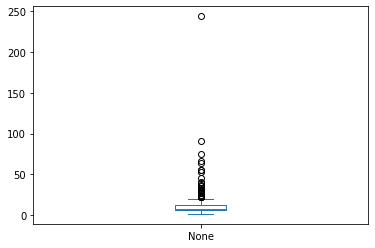

In [15]:
#箱ひげ図を描く
#シリーズに変換
distance = pd.Series(distance)
distance.plot(kind='box')

外れ値の判定

In [16]:
#基本統計量を調べる
tmp = distance.describe()

#四分位範囲を用いた外れ値の判定
iqr = tmp['75%'] - tmp['25%'] #IQR(第3四分位数と第1四分位数の差分)計算 
jougen = 1.5 * (iqr) + tmp['75%'] #値が大きい側の外れ値の閾値
kagen = tmp['25%'] - 1.5 * (iqr)  #値が小さい側の外れ値の閾値
#print(iqr, jougen, kagen)

#上限と下限の条件をもとに、シリーズで条件検索
outliner = distance[ (distance > jougen) | (distance < kagen)]
print(outliner.index)

Int64Index([  8,  11,  14,  16,  55,  65,  67,  68,  72, 109, 111, 128, 147,
            181, 189, 197, 206, 211, 225, 227, 247, 267, 279, 288, 293, 303,
            307, 308, 309, 310],
           dtype='int64')


外れ値の削除

In [17]:
train_val2 = train_val.drop(outliner.index)
train_val2.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,2,3
304,13.0,8,350.0,145.0,3988,13.0,73,0,0
305,18.5,8,360.0,150.0,3940,13.0,79,0,0
306,21.5,4,121.0,110.0,2600,12.8,77,1,0
311,29.0,4,85.0,52.0,2035,22.2,76,0,0
312,20.2,8,302.0,139.0,3570,12.8,78,0,0
313,27.9,4,156.0,105.0,2800,14.4,80,0,0
314,22.0,6,250.0,105.0,3353,14.5,76,0,0
315,29.0,4,68.0,49.0,1867,19.5,73,1,0
316,19.0,6,250.0,100.0,3282,15.0,71,0,0
317,25.0,4,90.0,71.0,2223,16.5,75,1,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


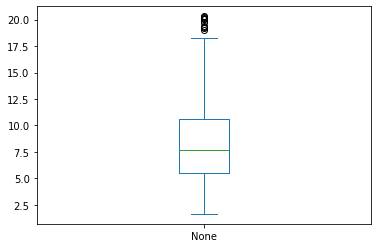

In [18]:
#はずれ値処理の結果 - 箱ひげ図を描く

#マハラノビス距離を計算
after_df = train_val2.drop(['MPG'], axis=1)

#マハラノビス距離を計算するための準備
#after_mcd = MinCovDet(random_state=0, support_fraction=0.7)
#after_mcd.fit(after_df)

#マハラノビス距離
after_distance = mcd.mahalanobis(after_df)
#シリーズに変換
after_distance = pd.Series(after_distance)
after_distance.plot(kind='box')

# ★ここまでで、欠損値の処理・外れ値の削除まで完了★
# 使用するデータフレームは train_val2 から開始

★１ 自力で特徴量の絞り込みをする場合

正解データと各特徴量の相関関係

In [19]:
#各列とMPG列との相関係数
train_cor = train_val2.corr()['MPG']

#相関係数を絶対値に変換
abs_cor = train_cor.map(abs)

#降順に並べ替え
abs_cor.sort_values(ascending = False)


MPG             1.000000
Weight          0.833257
Displacement    0.811897
Horsepower      0.801064
Cylinders       0.771582
Model Year      0.545033
3               0.486824
Acceleration    0.420276
2               0.207078
Name: MPG, dtype: float64

正解データと特徴量を抽出

In [20]:
#0～0.3未満：ほぼ無関係、0.3～0.5未満：非常に弱い相関、
#0.5～0.7未満：相関がある、0.7～0.9未満：強い相関、0.9以上：非常に強い相関

#特徴量 相関係数が0.5以上
col = ['Weight','Displacement','Horsepower','Cylinders', 'Model Year']

#特徴量 相関係数が0.7以上 -決定係数が下がるので却下
#col = ['Weight','Displacement','Horsepower','Cylinders']

x = train_val2.loc[:,col]
x.head(5)

,Weight,Displacement,Horsepower,Cylinders,Model Year
0,4135,318.0,150.0,8,72
1,1834,97.0,60.0,4,71
2,2188,97.0,78.0,4,80
3,1950,97.0,46.0,4,73
4,2635,120.0,74.0,4,81


In [21]:
#正解データ
t = train_val2[['MPG']]
t.head(5)

,MPG
0,15.0
1,27.0
2,34.3
3,26.0
4,31.6


特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにする

In [22]:
#多項式特徴量  … 相関係数が0.8以上の Weight, Displacement
#特徴量 x, 正解データ t
x['Weight_2'] = x['Weight'] ** 2
x['Displacement_2'] = x['Displacement'] ** 2
x.head(5)

,Weight,Displacement,Horsepower,Cylinders,Model Year,Weight_2,Displacement_2
0,4135,318.0,150.0,8,72,17098225,101124.0
1,1834,97.0,60.0,4,71,3363556,9409.0
2,2188,97.0,78.0,4,80,4787344,9409.0
3,1950,97.0,46.0,4,73,3802500,9409.0
4,2635,120.0,74.0,4,81,6943225,14400.0


In [23]:
#交互作用特徴量 … 排気量(Displacement), 馬力(Horsepower), 車重(Weight) が高いほど燃費が悪いと思う
x['Displacemen*Horsepower'] = x['Displacement'] * x['Horsepower']
x['Displacemen*Weight'] = x['Displacement'] * x['Weight']
x['Horsepower*Weight'] = x['Horsepower'] * x['Weight']
x.head(5)

,Weight,Displacement,Horsepower,Cylinders,Model Year,Weight_2,Displacement_2,Displacemen*Horsepower,Displacemen*Weight,Horsepower*Weight
0,4135,318.0,150.0,8,72,17098225,101124.0,47700.0,1314930.0,620250.0
1,1834,97.0,60.0,4,71,3363556,9409.0,5820.0,177898.0,110040.0
2,2188,97.0,78.0,4,80,4787344,9409.0,7566.0,212236.0,170664.0
3,1950,97.0,46.0,4,73,3802500,9409.0,4462.0,189150.0,89700.0
4,2635,120.0,74.0,4,81,6943225,14400.0,8880.0,316200.0,194990.0


訓練データと検証データに分けて、データを標準化

In [24]:
#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

#訓練データを標準化
sc_model_x = StandardScaler()
sc_model_y = StandardScaler()
sc_model_x.fit(x_train) #学習
sc_x_train = sc_model_x.transform(x_train) #標準化
sc_model_y.fit(y_train)
sc_y_train = sc_model_y.transform(y_train)


#検証データを標準化する
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)


★1の特徴量における 重回帰・リッジ回帰・ラッソ回帰で予測性能の評価

In [25]:
#重回帰モデルの作成と学習
lnreg_model_h1 = LinearRegression()
lnreg_model_h1.fit(sc_x_train, sc_y_train)

#訓練データと検証データの決定係数計算
lnreg_train_score_h1 = lnreg_model_h1.score(sc_x_train, sc_y_train)
lnreg_val_score_h1 = lnreg_model_h1.score(sc_x_val, sc_y_val)

print('重回帰 = ',lnreg_train_score_h1, lnreg_val_score_h1)

重回帰 =  0.862185193558483 0.8550041683075292


In [26]:
#リッジ回帰モデル
r_maxScore_h1 = 0
r_maxIndex_h1 = 0
#正則化項の定数を0.01 ～ 20まで0.01刻みで検証
for i in range(1, 2001):
  num = i/100
  ridge_model_h1 = Ridge(random_state = 0, alpha = num)
  ridge_model_h1.fit(sc_x_train, sc_y_train)

  redge_train_score_h1 = ridge_model_h1.score(sc_x_train, sc_y_train)
  if redge_train_score_h1 > r_maxScore_h1:
    r_maxScore_h1 = redge_train_score_h1
    r_maxIndex_h1 = num

#上記で求めた正則化項を使用
ridge_model_h1 = Ridge(random_state = 0, alpha = r_maxIndex_h1)
ridge_model_h1.fit(sc_x_train, sc_y_train)
redge_train_score_h1 = ridge_model_h1.score(sc_x_train, sc_y_train)
redge_val_score_h1 = ridge_model_h1.score(sc_x_val, sc_y_val)

print('リッジ回帰 = ', redge_train_score_h1, redge_val_score_h1, r_maxIndex_h1)

リッジ回帰 =  0.8620394711454814 0.857896599337762 0.01


In [27]:
#ラッソ回帰
l_maxScore_h1 = 0
l_maxIndex_h1 = 0
#正則化項の定数を0.01 ～ 20まで0.01刻みで検証
for i in range(1, 2001):
  num = i/100
  lasso_model_h1 = Lasso(random_state = 0, alpha = num)
  lasso_model_h1.fit(sc_x_train, sc_y_train)

  lasso_train_score_h1 = lasso_model_h1.score(sc_x_train, sc_y_train)
  if lasso_train_score_h1 > l_maxScore_h1:
    l_maxScore_h1 = lasso_train_score_h1
    l_maxIndex_h1 = num

#上記で求めた正則化項を使用
lasso_model_h1 = Lasso(random_state = 0, alpha = r_maxIndex_h1)
lasso_model_h1.fit(sc_x_train, sc_y_train)
lasso_train_score_h1 = lasso_model_h1.score(sc_x_train, sc_y_train)
lasso_val_score_h1 = lasso_model_h1.score(sc_x_val, sc_y_val)

print('ラッソ回帰 = ', lasso_train_score_h1, lasso_val_score_h1, l_maxIndex_h1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.867e-02, tolerance: 2.300e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ラッソ回帰 =  0.8368406157278739 0.8422071513375198 0.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.867e-02, tolerance: 2.300e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [28]:
#回帰木

dtree_model_h1 = DecisionTreeRegressor(max_depth=10, random_state=0)
dtree_model_h1.fit(sc_x_train, sc_y_train)

dtree_train_score_h1 = dtree_model_h1.score(sc_x_train, sc_y_train)
dtree_val_score_h1 = dtree_model_h1.score(sc_x_val, sc_y_val)

print('回帰木 = ', dtree_train_score_h1, dtree_val_score_h1)

回帰木 =  0.9981205919949864 0.8015208366761281


★2 特徴量をPolynomialFeaturesで自動化した場合

In [29]:
h2_t = train_val2[['MPG']] #正解データ
h2_x = train_val2.drop(['MPG'], axis=1) #特徴量(正解データ以外)

#標準化
h2_sc = StandardScaler()
h2_sc_x = h2_sc.fit_transform(h2_x)
h2_sc2 = StandardScaler()
h2_sc_t = h2_sc2.fit_transform(h2_t)

#累乗列と交互作用特徴量を一括追加
pf = PolynomialFeatures(degree = 2, include_bias = False)
pf_x = pf.fit_transform(h2_sc_x)  #2乗列と交互作用特徴量の追加
pf_x.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(288, 44)

In [30]:
#確認
pf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x6^2',
 'x6 x7',
 'x7^2']

★2の特徴量における 重回帰・リッジ回帰・ラッソ回帰で予測性能の評価

In [31]:
#訓練データと検証データに分割 -標準化済
x_train, x_test, y_train, y_test = train_test_split(pf_x, h2_sc_t, test_size=0.2, random_state=0)

In [32]:
#重回帰モデルの作成と学習
lnreg_model_h2 = LinearRegression()
lnreg_model_h2.fit(x_train, y_train)

#訓練データと検証データの決定係数計算
lnreg_train_score_h2 = lnreg_model_h2.score(x_train, y_train)
lnreg_val_score_h2 = lnreg_model_h2.score(x_test, y_test)

print('重回帰 = ',lnreg_train_score_h2, lnreg_val_score_h2)

重回帰 =  0.8992919598923387 0.8250716820705016


In [33]:
#リッジ回帰モデル
r_maxScore_h2 = 0
r_maxIndex_h2 = 0
#正則化項の定数を0.01 ～ 20まで0.01刻みで検証
for i in range(1, 2001):
  num = i/100
  ridge_model_h2 = Ridge(random_state = 0, alpha = num)
  ridge_model_h2.fit(x_train, y_train)

  redge_train_score_h2 = ridge_model_h2.score(x_train, y_train)
  if redge_train_score_h2 > r_maxScore_h2:
    r_maxScore_h2 = redge_train_score_h2
    r_maxIndex_h2 = num

#上記で求めた正則化項を使用
ridge_model_h2 = Ridge(random_state = 0, alpha = r_maxIndex_h2)
ridge_model_h2.fit(x_train, y_train)
redge_train_score_h2 = ridge_model_h2.score(x_train, y_train)
redge_val_score_h2 = ridge_model_h2.score(x_test, y_test)

print('リッジ回帰 = ', redge_train_score_h2, redge_val_score_h2, r_maxIndex_h2)

リッジ回帰 =  0.899305737707804 0.8274892354642319 0.01


In [34]:
#ラッソ回帰
l_maxScore_h2 = 0
l_maxIndex_h2 = 0
#正則化項の定数を0.01 ～ 20まで0.01刻みで検証
for i in range(1, 2001):
  num = i/100
  lasso_model_h2 = Lasso(random_state = 0, alpha = num)
  lasso_model_h2.fit(x_train, y_train)

  lasso_train_score_h2 = lasso_model_h2.score(x_train, y_train)
  if lasso_train_score_h2 > l_maxScore_h2:
    l_maxScore_h2 = lasso_train_score_h2
    l_maxIndex_h2 = num

#上記で求めた正則化項を使用
lasso_model_h2 = Lasso(random_state = 0, alpha = l_maxIndex_h2)
lasso_model_h2.fit(x_train, y_train)
lasso_train_score_h2 = lasso_model_h2.score(x_train, y_train)
lasso_val_score_h2 = lasso_model_h2.score(x_test, y_test)

print('ラッソ回帰 = ', lasso_train_score_h2, lasso_val_score_h2, l_maxIndex_h2)

ラッソ回帰 =  0.8797693629127527 0.8716960212939054 0.01


In [35]:
#回帰木
dtree_model_h2 = DecisionTreeRegressor(max_depth=10, random_state=0)
dtree_model_h2.fit(x_train, y_train)

dtree_train_score_h2 = dtree_model_h2.score(x_train, y_train)
dtree_val_score_h2 = dtree_model_h2.score(x_test, y_test)

print('回帰木 = ', dtree_train_score_h2, dtree_val_score_h2)

回帰木 =  0.9969225117453833 0.7973808818865522


In [36]:
#学習モデルの比較
print('★1 特徴量を自前で追加した場合')
print('重回帰     = ',lnreg_train_score_h1, lnreg_val_score_h1) #モデル lnreg_model_h1
print('リッジ回帰 = ', redge_train_score_h1, redge_val_score_h1, r_maxIndex_h1) #モデル ridge_model_h1
print('ラッソ回帰 = ', lasso_train_score_h1, lasso_val_score_h1, l_maxIndex_h1) #モデル lasso_model_h1
print('回帰木     =  ', dtree_train_score_h1, dtree_val_score_h1) #モデル dtree_model_h1

print('★2 特徴量をPolynomialFeaturesで自動化した場合')
print('重回帰     = ',lnreg_train_score_h2, lnreg_val_score_h2) #モデル lnreg_model_h2
print('リッジ回帰 = ', redge_train_score_h2, redge_val_score_h2, r_maxIndex_h2) #モデル ridge_model_h2
print('ラッソ回帰 = ', lasso_train_score_h2, lasso_val_score_h2, l_maxIndex_h2) #モデル lasso_model_h2
print('回帰木     =  ', dtree_train_score_h2, dtree_val_score_h2) #モデル dtree_model_h2

★1 特徴量を自前で追加した場合
重回帰     =  0.862185193558483 0.8550041683075292
リッジ回帰 =  0.8620394711454814 0.857896599337762 0.01
ラッソ回帰 =  0.8368406157278739 0.8422071513375198 0.01
回帰木     =   0.9981205919949864 0.8015208366761281
★2 特徴量をPolynomialFeaturesで自動化した場合
重回帰     =  0.8992919598923387 0.8250716820705016
リッジ回帰 =  0.899305737707804 0.8274892354642319 0.01
ラッソ回帰 =  0.8797693629127527 0.8716960212939054 0.01
回帰木     =   0.9969225117453833 0.7973808818865522


★★★上記結果より、PolynomialFeaturesを使用して多項式項や交互作用特徴量を自動で生成し、検証データの決定係数が最も高いラッソ回帰(正則化項0.01)がベストと思われる★★★

## 正解率または決定係数の表示(未知のデータ:testを使用した予測)

テストデータを使用したモデルの評価

In [37]:
test = test.reset_index(drop=True)
test

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,2,3
0,14.0,8,351.0,153.0,4129,13.0,72,0,0
1,25.0,4,140.0,75.0,2542,17.0,74,0,0
2,13.0,8,302.0,140.0,4294,16.0,72,0,0
3,21.0,4,120.0,87.0,2979,19.5,72,1,0
4,18.0,6,232.0,100.0,3288,15.5,71,0,0
...,...,...,...,...,...,...,...,...,...
75,30.9,4,105.0,75.0,2230,14.5,78,0,0
76,26.0,4,97.0,75.0,2265,18.2,77,0,1
77,32.0,4,83.0,61.0,2003,19.0,74,0,1
78,24.5,4,98.0,60.0,2164,22.1,76,0,0


In [38]:
#testの欠損値処理 - 欠損値の確認
test.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      1
Weight          0
Acceleration    0
Model Year      0
2               0
3               0
dtype: int64

In [39]:
#### Horsepower(馬力) は時系列ではないため、教師あり学習による補完を行う

## Horsepower(馬力) を予測する重回帰の予測モデルを作成
#  Horsepower(馬力)の欠損は1個
test_non_df = test.dropna() #欠損値を含む行を削除

test_temp_x = test_non_df.drop(['Horsepower'], axis=1)
test_temp_t = test_non_df['Horsepower']

test_temp_model = LinearRegression()
test_temp_model.fit(test_temp_x, test_temp_t)   #Horsepowerを予測するための学習

## 欠損データの本来の値を予測して補完
# 欠損行の抜き出し
test_condition = test['Horsepower'].isnull() #欠損値有り：True、欠損値無し：False
test_non_data = test.loc[test_condition]          #欠損値有り：True の行だけを抜き出す

#特徴量を抜き出し、モデルで予測
test_temp_x = test_non_data.drop(['Horsepower'], axis=1)
test_pred = temp_model.predict(test_temp_x)

#欠損行のHorsepowerのマスを抜き出して、predで代入
test.loc[test_condition, 'Horsepower'] = test_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [40]:
#確認用
test.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
2               0
3               0
dtype: int64

In [41]:
#外れ値の処理 
#マハラノビス距離を計算
test_temp_df = test.drop(['MPG'], axis=1)
print(test_temp_df)

#マハラノビス距離を計算するための準備
test_mcd = MinCovDet(random_state=0, support_fraction=0.7)
test_mcd.fit(test_temp_df)

#マハラノビス距離
test_distance = test_mcd.mahalanobis(test_temp_df)
test_distance

    Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  2  \
0           8         351.0       153.0    4129          13.0          72  0   
1           4         140.0        75.0    2542          17.0          74  0   
2           8         302.0       140.0    4294          16.0          72  0   
3           4         120.0        87.0    2979          19.5          72  1   
4           6         232.0       100.0    3288          15.5          71  0   
..        ...           ...         ...     ...           ...         ... ..   
75          4         105.0        75.0    2230          14.5          78  0   
76          4          97.0        75.0    2265          18.2          77  0   
77          4          83.0        61.0    2003          19.0          74  0   
78          4          98.0        60.0    2164          22.1          76  0   
79          8         350.0       180.0    3664          11.0          73  0   

    3  
0   0  
1   0  
2   0  
3   0  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([  7.11890404,   4.20442112,  10.79959692,  12.04428017,
         4.181197  ,  14.0533251 ,   6.1672223 ,  13.12221553,
        43.60287242,  11.3252057 ,  12.13508158,   5.74590058,
         8.17456254,  18.63873548,   5.1512565 ,   7.08328891,
         8.83419605,   8.74177711,   4.95617567,   8.00831427,
        42.89070481,   3.9395039 ,   6.48606397,  11.44802109,
         4.63351467,  11.88625742,   6.63190055,   9.64864705,
         7.04231797,   3.73678793,   4.99759771,   5.69175189,
        12.42324951,   5.09718348,   3.23415897,   9.48419752,
         2.70766022,   9.88375418,   8.8835405 ,  36.28043039,
       100.02337523,  22.04480894,   7.03375278,  13.29799575,
        12.1848265 ,   9.06675173,   3.34612698,  12.83491126,
        19.58739925,   6.99270073,   8.39560451,   6.16517284,
        11.18494391,   8.02999394,  47.2571279 ,  44.31623652,
        11.64486085,   5.39827749,   7.46425683,  13.70896353,
        11.02873977,  11.11811326,   6.36935049,   7.45

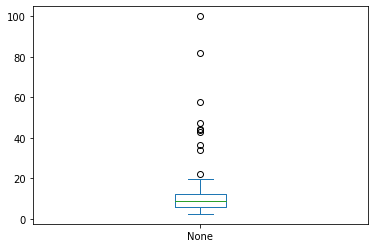

In [42]:
#箱ひげ図を描く
#シリーズに変換
test_distance = pd.Series(test_distance)
test_distance.plot(kind='box')

In [43]:
#基本統計量を調べる
tmp = test_distance.describe()

#四分位範囲を用いた外れ値の判定
iqr = tmp['75%'] - tmp['25%'] #IQR(第3四分位数と第1四分位数の差分)計算 
jougen = 1.5 * (iqr) + tmp['75%'] #値が大きい側の外れ値の閾値
kagen = tmp['25%'] - 1.5 * (iqr)  #値が小さい側の外れ値の閾値
#print(iqr, jougen, kagen)

#上限と下限の条件をもとに、シリーズで条件検索
outliner = test_distance[ (test_distance > jougen) | (test_distance < kagen)]
print(outliner.index)

Int64Index([8, 20, 39, 40, 41, 54, 55, 66, 69, 79], dtype='int64')


In [44]:
#確認用
print(test)

     MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0   14.0          8         351.0       153.0    4129          13.0   
1   25.0          4         140.0        75.0    2542          17.0   
2   13.0          8         302.0       140.0    4294          16.0   
3   21.0          4         120.0        87.0    2979          19.5   
4   18.0          6         232.0       100.0    3288          15.5   
..   ...        ...           ...         ...     ...           ...   
75  30.9          4         105.0        75.0    2230          14.5   
76  26.0          4          97.0        75.0    2265          18.2   
77  32.0          4          83.0        61.0    2003          19.0   
78  24.5          4          98.0        60.0    2164          22.1   
79  11.0          8         350.0       180.0    3664          11.0   

    Model Year  2  3  
0           72  0  0  
1           74  0  0  
2           72  0  0  
3           72  1  0  
4           71  0  0  
..       

### ▼データフレーム形式で表示

In [45]:
test2 = test.drop(outliner.index)
test2.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,2,3
0,14.0,8,351.0,153.00000,4129,13.0,72,0,0
1,25.0,4,140.0,75.00000,2542,17.0,74,0,0
2,13.0,8,302.0,140.00000,4294,16.0,72,0,0
3,21.0,4,120.0,87.00000,2979,19.5,72,1,0
4,18.0,6,232.0,100.00000,3288,15.5,71,0,0
5,35.0,4,72.0,69.00000,1613,18.0,71,0,1
6,34.1,4,86.0,65.00000,1975,15.2,79,0,1
7,20.0,4,140.0,90.00000,2408,19.5,72,0,0
9,23.5,6,173.0,110.00000,2725,12.6,81,0,0
10,40.9,4,85.0,57.10319,1835,17.3,80,1,0


### ▼メソッドを使用するときはどのような処理をするのかを記述

テスト用の欠損値・外れ値処理終了(test2を使え)

In [46]:
#PolynomialFeaturesを使用して特徴量を出す
h2_test_t = test2[['MPG']] #正解データ
h2_test_x = test2.drop(['MPG'], axis=1) #特徴量(正解データ以外)

#標準化
h2_test_sc = StandardScaler()
h2_test_sc_x = h2_test_sc.fit_transform(h2_test_x)
h2_test_sc2 = StandardScaler()
h2_test_sc_t = h2_test_sc2.fit_transform(h2_test_t)

#累乗列と交互作用特徴量を一括追加
test_pf = PolynomialFeatures(degree = 2, include_bias = False)
test_pf_x = test_pf.fit_transform(h2_test_sc_x)  #2乗列と交互作用特徴量の追加
test_pf_x.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(70, 44)

In [47]:
#決定係数を求める
print('ラッソ回帰', lasso_model_h2.score(test_pf_x, h2_test_sc_t))

ラッソ回帰 0.8563370417155265


保存：モデルは auto_mgp.pkl, 選択モデルはラッソ回帰

In [48]:
import pickle

with open('auto_mgp.pkl', 'wb') as f:
  pickle.dump(lasso_model_h2, f)